In [2]:
from transformers import pipeline

In [3]:
sent_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
sent_pipeline("i love coding!")

[{'label': 'POSITIVE', 'score': 0.9997907280921936}]

In [5]:
sent_pipeline("i hate coding!")

[{'label': 'NEGATIVE', 'score': 0.9987181425094604}]

In [6]:
import json

In [7]:
import pandas as pd
file = r"/Users/sunkeswaramsreeja/Desktop/Health_and_Personal_Care.jsonl"
df=pd.read_json(file,lines=True)

In [8]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-06 00:49:35.902,3,True
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2020-11-02 22:03:06.880,3,True
2,5,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2019-07-24 11:13:58.905,0,True
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,2022-09-04 02:29:02.725,7,True
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:53:07.262,0,True


In [9]:
df.shape

(494121, 10)

In [10]:
data=df.head(5000)

In [11]:
from transformers import DistilBertTokenizer

# Define the tokenizer
tokenizer=DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


# Filter rows where the text length exceeds 512 tokens
data=data[data['text'].apply(lambda x:len(tokenizer.tokenize(x)))<500]

In [13]:
data.sentiment=data['text'].apply(sent_pipeline)

/var/folders/hr/xps4q_dd3611wkdd5br2tbs40000gn/T/ipykernel_52741/1119495400.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.sentiment=data['text'].apply(sent_pipeline)


In [14]:
data.sentiment

0       [{'label': 'NEGATIVE', 'score': 0.978313386440...
1       [{'label': 'POSITIVE', 'score': 0.999182641506...
2       [{'label': 'NEGATIVE', 'score': 0.969690382480...
3       [{'label': 'NEGATIVE', 'score': 0.991963386535...
4       [{'label': 'NEGATIVE', 'score': 0.997587800025...
                              ...                        
4995    [{'label': 'NEGATIVE', 'score': 0.990723073482...
4996    [{'label': 'POSITIVE', 'score': 0.999745905399...
4997    [{'label': 'POSITIVE', 'score': 0.989800274372...
4998    [{'label': 'NEGATIVE', 'score': 0.987770438194...
4999    [{'label': 'POSITIVE', 'score': 0.999873161315...
Name: text, Length: 4927, dtype: object

In [16]:
data.sentiment.to_csv('/Users/sunkeswaramsreeja/Desktop/results.csv', index=False)

In [18]:
f = r"/Users/sunkeswaramsreeja/Desktop/results.csv"
res=pd.read_csv(f)

In [19]:
res.head()

,text
0,"[{'label': 'NEGATIVE', 'score': 0.978313386440..."
1,"[{'label': 'POSITIVE', 'score': 0.999182641506..."
2,"[{'label': 'NEGATIVE', 'score': 0.969690382480..."
3,"[{'label': 'NEGATIVE', 'score': 0.991963386535..."
4,"[{'label': 'NEGATIVE', 'score': 0.997587800025..."


In [20]:
data['id'] = range(1, len(data) + 1)

In [21]:
da=pd.DataFrame(res)

In [22]:
da.head()

,text
0,"[{'label': 'NEGATIVE', 'score': 0.978313386440..."
1,"[{'label': 'POSITIVE', 'score': 0.999182641506..."
2,"[{'label': 'NEGATIVE', 'score': 0.969690382480..."
3,"[{'label': 'NEGATIVE', 'score': 0.991963386535..."
4,"[{'label': 'NEGATIVE', 'score': 0.997587800025..."


In [23]:
da=da.rename(columns={'text':'senti_res'})

In [24]:
da['id'] = range(1, len(data) + 1)

In [25]:
da.head()

,senti_res,id
0,"[{'label': 'NEGATIVE', 'score': 0.978313386440...",1
1,"[{'label': 'POSITIVE', 'score': 0.999182641506...",2
2,"[{'label': 'NEGATIVE', 'score': 0.969690382480...",3
3,"[{'label': 'NEGATIVE', 'score': 0.991963386535...",4
4,"[{'label': 'NEGATIVE', 'score': 0.997587800025...",5


In [26]:
data= data.merge(da, left_on='id', right_on='id', how='left')

In [27]:
data.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,id,senti_res
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-06 00:49:35.902,3,True,1,"[{'label': 'NEGATIVE', 'score': 0.978313386440..."
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2020-11-02 22:03:06.880,3,True,2,"[{'label': 'POSITIVE', 'score': 0.999182641506..."
2,5,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2019-07-24 11:13:58.905,0,True,3,"[{'label': 'NEGATIVE', 'score': 0.969690382480..."
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,2022-09-04 02:29:02.725,7,True,4,"[{'label': 'NEGATIVE', 'score': 0.991963386535..."
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:53:07.262,0,True,5,"[{'label': 'NEGATIVE', 'score': 0.997587800025..."


In [28]:
data=data.rename(columns={'text_y':'senti_res'})
data=data.rename(columns={'text_x':'text'})

In [29]:
data.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,id,senti_res
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-06 00:49:35.902,3,True,1,"[{'label': 'NEGATIVE', 'score': 0.978313386440..."
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2020-11-02 22:03:06.880,3,True,2,"[{'label': 'POSITIVE', 'score': 0.999182641506..."
2,5,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2019-07-24 11:13:58.905,0,True,3,"[{'label': 'NEGATIVE', 'score': 0.969690382480..."
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,2022-09-04 02:29:02.725,7,True,4,"[{'label': 'NEGATIVE', 'score': 0.991963386535..."
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:53:07.262,0,True,5,"[{'label': 'NEGATIVE', 'score': 0.997587800025..."


In [43]:
data['senti_lst'] = data['senti_res'].apply(lambda x:x.strip('['']'))

In [44]:
data['senti_lst'].head()

0    {'label': 'NEGATIVE', 'score': 0.9783133864402...
1    {'label': 'POSITIVE', 'score': 0.9991826415061...
2    {'label': 'NEGATIVE', 'score': 0.9696903824806...
3    {'label': 'NEGATIVE', 'score': 0.9919633865356...
4    {'label': 'NEGATIVE', 'score': 0.9975878000259...
Name: senti_lst, dtype: object

In [46]:
type(data['senti_res'][0])

str

In [55]:
# def str2dict(x):
#     return json.loads(x)
import re
import ast
def str2dict(data):
    x = ast.literal_eval(re.search('({.+})', data).group(0))
    return x
# {'Bar': 'value', /'Foo': '1002803'}

In [56]:
data['SentiDict']=data['senti_lst'].apply(str2dict)
data['SentiDict'][0]

{'label': 'NEGATIVE', 'score': 0.9783133864402771}

In [57]:
type(data['SentiDict'][0])

dict

In [58]:
def extract_values(dic):
    label = dic['label']
    score = dic['score']
    return label,score

In [61]:
data['senti_lst']=data['SentiDict'].apply(extract_values)

In [67]:
# data.columns
del data['label', 'score']

In [79]:
# del data['SentiDict']
# del data['senti_res']#, 
# del data['label']#,
del data['score']

In [80]:
data.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,id,senti_lst
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-06 00:49:35.902,3,True,1,"(NEGATIVE, 0.9783133864402771)"
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2020-11-02 22:03:06.880,3,True,2,"(POSITIVE, 0.9991826415061951)"
2,5,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2019-07-24 11:13:58.905,0,True,3,"(NEGATIVE, 0.9696903824806213)"
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,2022-09-04 02:29:02.725,7,True,4,"(NEGATIVE, 0.9919633865356445)"
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:53:07.262,0,True,5,"(NEGATIVE, 0.9975878000259399)"


In [81]:
data[['label','score']] = pd.DataFrame(data.senti_lst.tolist(), index= data.index)

In [82]:
data.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,id,senti_lst,label,score
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-06 00:49:35.902,3,True,1,"(NEGATIVE, 0.9783133864402771)",NEGATIVE,0.978313
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2020-11-02 22:03:06.880,3,True,2,"(POSITIVE, 0.9991826415061951)",POSITIVE,0.999183
2,5,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2019-07-24 11:13:58.905,0,True,3,"(NEGATIVE, 0.9696903824806213)",NEGATIVE,0.969690
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,2022-09-04 02:29:02.725,7,True,4,"(NEGATIVE, 0.9919633865356445)",NEGATIVE,0.991963
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:53:07.262,0,True,5,"(NEGATIVE, 0.9975878000259399)",NEGATIVE,0.997588


In [83]:
data.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'id', 'senti_lst',
       'label', 'score'],
      dtype='object')

In [98]:
data.label.value_counts()

POSITIVE    3248
NEGATIVE    1679
Name: label, dtype: int64

In [100]:
import matplotlib.pyplot as plt

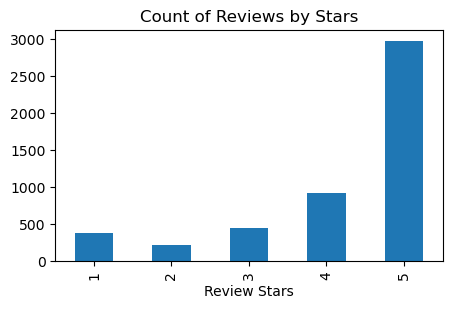

In [104]:
ax = data['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(5,3))
ax.set_xlabel('Review Stars')
plt.show()

In [133]:
pos=data[data['label']=='POSITIVE']

In [134]:
pos

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,id,senti_lst,label,score
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2020-11-02 22:03:06.880,3,True,2,"(POSITIVE, 0.9991826415061951)",POSITIVE,0.999183
5,5,Every home should have these,"I have never been big on vitamins, with the ex...",[],B09GBMG83Z,B09GBMG83Z,AFSKPY37N3C43SOI5IEXEK5JSIYA,2022-02-21 00:14:54.796,1,False,6,"(POSITIVE, 0.9841381907463074)",POSITIVE,0.984138
6,4,Versatile shaver,"To be honest, my husband did not use this for ...",[],B09FKT5PQ9,B09FKT5PQ9,AFSKPY37N3C43SOI5IEXEK5JSIYA,2022-02-07 20:38:46.005,0,False,7,"(POSITIVE, 0.9983637928962708)",POSITIVE,0.998364
7,4,Makes a nice compact noise machine to take wit...,This is a nice basic sound machine. I have use...,[],B08THJD1MH,B08THJD1MH,AFSKPY37N3C43SOI5IEXEK5JSIYA,2021-04-08 18:45:34.645,0,False,8,"(POSITIVE, 0.9922720193862915)",POSITIVE,0.992272
8,5,Great drawstring holiday bags!,This are super colorful great gift giving holi...,[],B08FCQML37,B08FCQML37,AFSKPY37N3C43SOI5IEXEK5JSIYA,2020-12-15 21:15:39.529,0,False,9,"(POSITIVE, 0.9998494386672974)",POSITIVE,0.999849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,5,Good supplement,Great supplement,[],B07ZPK5SRD,B07ZPK5SRD,AFFAHZZ6TXM6D6OPE6GJ5ZD5QEKQ,2020-04-23 17:43:53.344,0,True,4918,"(POSITIVE, 0.9996775388717651)",POSITIVE,0.999678
4921,5,Quality,All around nice product good amount for the pr...,[],B07HHJ2H2L,B07HHJ2H2L,AE3A4IYU4JY73JI5QSIKOVYKRV6A,2019-05-01 12:50:57.073,0,True,4922,"(POSITIVE, 0.9971398115158081)",POSITIVE,0.997140
4923,5,Sporty clothes protector,Everyone that see's this on my Dad just loves it.,[],B00ZR8OISU,B00ZR8OISU,AFCJA6WHBTBORS4IM4NXGFOSUU2A,2016-05-31 20:45:04.000,1,True,4924,"(POSITIVE, 0.9997459053993225)",POSITIVE,0.999746
4924,5,Five Stars,Great way to get vitamin C that isn't from cor...,[],B011J478G4,B011J478G4,AFTJNP45GRWVGDWRHHYO2AXC7TRA,2016-05-13 15:12:01.000,0,True,4925,"(POSITIVE, 0.9898002743721008)",POSITIVE,0.989800


In [152]:
neg=data[data['label']=='NEGATIVE']

In [157]:
neg.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,id,senti_lst,label,score
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-06 00:49:35.902,3,True,1,"(NEGATIVE, 0.9783133864402771)",NEGATIVE,0.978313
2,5,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2019-07-24 11:13:58.905,0,True,3,"(NEGATIVE, 0.9696903824806213)",NEGATIVE,0.969690
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,2022-09-04 02:29:02.725,7,True,4,"(NEGATIVE, 0.9919633865356445)",NEGATIVE,0.991963
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:53:07.262,0,True,5,"(NEGATIVE, 0.9975878000259399)",NEGATIVE,0.997588
9,3,Not as good as the name brand whitening strips...,I guess the only product I have in my history ...,[],B08GYM3HVP,B08GYM3HVP,AFSKPY37N3C43SOI5IEXEK5JSIYA,2020-10-14 21:25:18.369,0,False,10,"(NEGATIVE, 0.9958051443099976)",NEGATIVE,0.995805


In [163]:
pos.rating.value_counts()

5    2487
4     595
3     120
1      26
2      20
Name: rating, dtype: int64

Text(0, 0.5, 'Count')

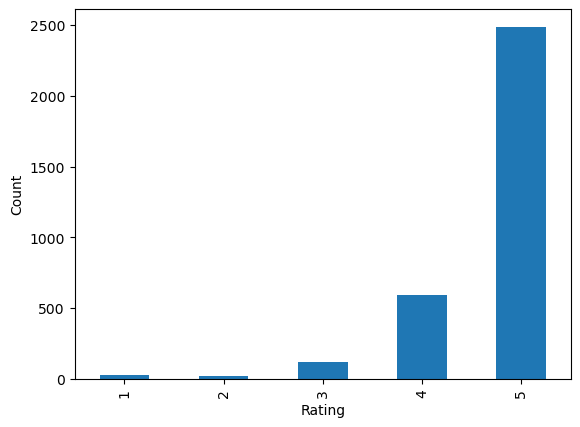

In [161]:
pos.rating.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')

In [162]:
neg.rating.value_counts()

5    493
1    347
4    326
3    323
2    190
Name: rating, dtype: int64

Text(0, 0.5, 'Count')

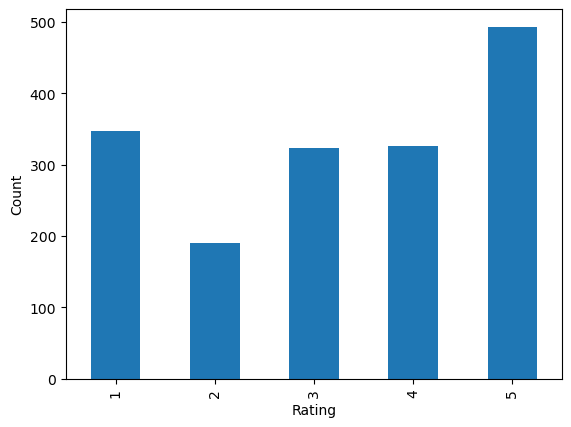

In [160]:
neg.rating.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')

In [156]:
data.to_csv('/Users/sunkeswaramsreeja/Desktop/overall_data.csv', index=False)

In [171]:
neg.query("rating==5")[['text']]

,text
2,I have been suffering a couple months with hee...
17,it was a nice tray smaller than i expected bu...
23,In this day and age of excessive hand washing ...
47,I’ve only used these cups a few times as my hu...
51,I'm kind of between a 6 and a 6 1/2 so some sh...
...,...
4867,70% alcohol was hard to find and somewhat expe...
4875,I had a very expensive dental guard made by my...
4884,These clippers are a strong sturdy and sharp b...
4888,"Supplements were a great deal, cheaper than th..."


In [179]:
data['text'].iloc[2]

"I have been suffering a couple months with heel pain from plantar fasciitis.  I thought I'd give these a try and wow, I was surprised at how much they cut down on the pain.  I wish they came in a tighter and thicker version."

In [177]:
data['label'].iloc[2]

'NEGATIVE'

In [ ]:
#it was a nice tray  smaller than i expected but my walker has  rubber grips and the tray didnt fit over it  - now what do i do ?  buy a new walker ?  idk what to do to be honest  im assuming all trays will have the same issue due to those grips  companies should realize walkers come with grips and make the trays fit either or somehow